In [1]:
from datasets import load_dataset, DatasetDict, Dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification
)
from data import RationalWeight
from data import plotDistribution
from data import plotRocAuc
from data import binaryMetricsCompute
from data import plotConfusionMatrix

%load_ext autoreload
%autoreload 2

In [2]:
import logging
logger = logging.getLogger(__name__)
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.INFO, datefmt='%I:%M:%S')

In [3]:
id2label = {0: "Negative", 1: "Positive"}
label2id = {"Negative": 0, "Positive": 1}

In [4]:
data_files = {'train': 'train.parquet', 'test': 'test.parquet'}
dataset = load_dataset('../datasets/imdbstfd', data_files=data_files)

In [5]:
dataset = dataset.shuffle(seed=88)

In [6]:
model = AutoModelForSequenceClassification.from_pretrained(
    "../models/bert-base-uncased-IMDB-retrain", num_labels=2, id2label=id2label, label2id=label2id
)
model.eval()

10:08:32 WARNING:From C:\Users\Alex\anaconda\Lib\site-packages\keras\src\losses.py:2976: The name tf.losses.sparse_softmax_cross_entropy is deprecated. Please use tf.compat.v1.losses.sparse_softmax_cross_entropy instead.



BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [7]:
tokenizer = AutoTokenizer.from_pretrained("../models/bert-base-uncased-IMDB-retrain", use_fast=True)

In [8]:
for name, param in model.named_parameters():
    print(name)

bert.embeddings.word_embeddings.weight
bert.embeddings.position_embeddings.weight
bert.embeddings.token_type_embeddings.weight
bert.embeddings.LayerNorm.weight
bert.embeddings.LayerNorm.bias
bert.encoder.layer.0.attention.self.query.weight
bert.encoder.layer.0.attention.self.query.bias
bert.encoder.layer.0.attention.self.key.weight
bert.encoder.layer.0.attention.self.key.bias
bert.encoder.layer.0.attention.self.value.weight
bert.encoder.layer.0.attention.self.value.bias
bert.encoder.layer.0.attention.output.dense.weight
bert.encoder.layer.0.attention.output.dense.bias
bert.encoder.layer.0.attention.output.LayerNorm.weight
bert.encoder.layer.0.attention.output.LayerNorm.bias
bert.encoder.layer.0.intermediate.dense.weight
bert.encoder.layer.0.intermediate.dense.bias
bert.encoder.layer.0.output.dense.weight
bert.encoder.layer.0.output.dense.bias
bert.encoder.layer.0.output.LayerNorm.weight
bert.encoder.layer.0.output.LayerNorm.bias
bert.encoder.layer.1.attention.self.query.weight
bert.enc

In [9]:
original = RationalWeight(model, tokenizer, dataset)

In [10]:
layer = "bert.pooler.dense.weight"

In [11]:
one, two, three = original.threeSigmaCompute(layer)

2025-01-16 22:08:33,295 data INFO  
 One sigma: [-0.02907184886498726, 0.029134806220099563], 
 Two sigma: [-0.05817517640753067, 0.058238133762642974], 
 Three sigma: [-0.08727850395007408, 0.08734146130518639]
10:08:33 INFO: 
 One sigma: [-0.02907184886498726, 0.029134806220099563], 
 Two sigma: [-0.05817517640753067, 0.058238133762642974], 
 Three sigma: [-0.08727850395007408, 0.08734146130518639]


In [12]:
original.weightFreeze()

2025-01-16 22:08:33,422 data INFO bert.embeddings.word_embeddings.weight
10:08:33 INFO:bert.embeddings.word_embeddings.weight
2025-01-16 22:08:33,424 data INFO bert.embeddings.position_embeddings.weight
10:08:33 INFO:bert.embeddings.position_embeddings.weight
2025-01-16 22:08:33,425 data INFO bert.embeddings.token_type_embeddings.weight
10:08:33 INFO:bert.embeddings.token_type_embeddings.weight
2025-01-16 22:08:33,427 data INFO bert.embeddings.LayerNorm.weight
10:08:33 INFO:bert.embeddings.LayerNorm.weight
2025-01-16 22:08:33,428 data INFO bert.embeddings.LayerNorm.bias
10:08:33 INFO:bert.embeddings.LayerNorm.bias
2025-01-16 22:08:33,429 data INFO bert.encoder.layer.0.attention.self.query.weight
10:08:33 INFO:bert.encoder.layer.0.attention.self.query.weight
2025-01-16 22:08:33,430 data INFO bert.encoder.layer.0.attention.self.query.bias
10:08:33 INFO:bert.encoder.layer.0.attention.self.query.bias
2025-01-16 22:08:33,431 data INFO bert.encoder.layer.0.attention.self.key.weight
10:08:33 


Number of ZERO: 0;
Percent of ZERO: 0.0;
    



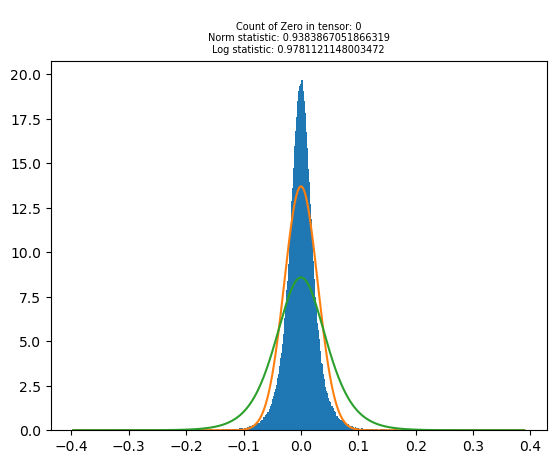

In [13]:
originalLayer = original.layerSearch(layer)
plotDistribution(originalLayer)

In [14]:
label, outSoftmax, outIndex = original.outputCompute(60)

2025-01-16 22:08:35,942 data INFO 
Label: 0 
Prob: tensor([[0.8799, 0.1201]]) 
IndexMax: 0
10:08:35 INFO:
Label: 0 
Prob: tensor([[0.8799, 0.1201]]) 
IndexMax: 0
2025-01-16 22:08:36,021 data INFO 
Label: 1 
Prob: tensor([[0.0148, 0.9852]]) 
IndexMax: 1
10:08:36 INFO:
Label: 1 
Prob: tensor([[0.0148, 0.9852]]) 
IndexMax: 1
2025-01-16 22:08:36,102 data INFO 
Label: 0 
Prob: tensor([[0.5210, 0.4790]]) 
IndexMax: 0
10:08:36 INFO:
Label: 0 
Prob: tensor([[0.5210, 0.4790]]) 
IndexMax: 0
2025-01-16 22:08:36,172 data INFO 
Label: 0 
Prob: tensor([[0.3064, 0.6936]]) 
IndexMax: 1
10:08:36 INFO:
Label: 0 
Prob: tensor([[0.3064, 0.6936]]) 
IndexMax: 1
2025-01-16 22:08:36,255 data INFO 
Label: 1 
Prob: tensor([[0.8125, 0.1875]]) 
IndexMax: 0
10:08:36 INFO:
Label: 1 
Prob: tensor([[0.8125, 0.1875]]) 
IndexMax: 0
2025-01-16 22:08:36,340 data INFO 
Label: 1 
Prob: tensor([[0.2903, 0.7097]]) 
IndexMax: 1
10:08:36 INFO:
Label: 1 
Prob: tensor([[0.2903, 0.7097]]) 
IndexMax: 1
2025-01-16 22:08:36,412 data

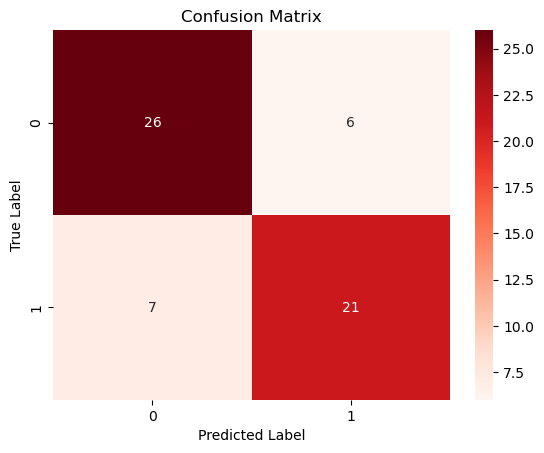

In [15]:
plotConfusionMatrix(label, outIndex)

Accuracy: 0.7833333333333333;
ROC AUC score: 0.9151785714285714, 0.08482142857142858;
F1: 0.7636363636363638
Precision: 0.7777777777777778;
Recall: 0.75


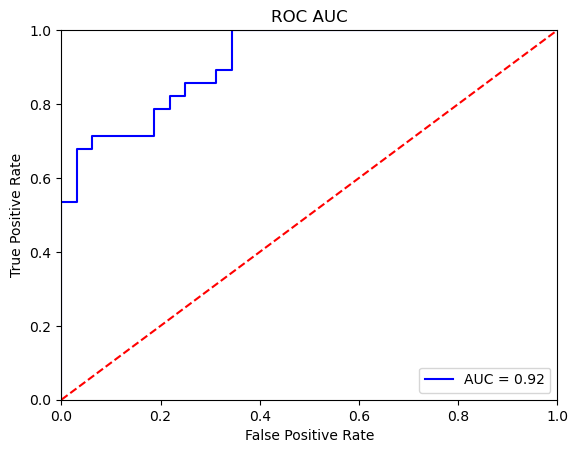

In [16]:
binaryMetricsCompute(label, outIndex, outSoftmax)
plotRocAuc(label, outSoftmax[:, 1])

In [17]:
weighter = RationalWeight(model, tokenizer, dataset)
weighter.weightFreeze()

2025-01-16 22:08:42,715 data INFO bert.embeddings.word_embeddings.weight
10:08:42 INFO:bert.embeddings.word_embeddings.weight
2025-01-16 22:08:42,717 data INFO bert.embeddings.position_embeddings.weight
10:08:42 INFO:bert.embeddings.position_embeddings.weight
2025-01-16 22:08:42,718 data INFO bert.embeddings.token_type_embeddings.weight
10:08:42 INFO:bert.embeddings.token_type_embeddings.weight
2025-01-16 22:08:42,719 data INFO bert.embeddings.LayerNorm.weight
10:08:42 INFO:bert.embeddings.LayerNorm.weight
2025-01-16 22:08:42,720 data INFO bert.embeddings.LayerNorm.bias
10:08:42 INFO:bert.embeddings.LayerNorm.bias
2025-01-16 22:08:42,721 data INFO bert.encoder.layer.0.attention.self.query.weight
10:08:42 INFO:bert.encoder.layer.0.attention.self.query.weight
2025-01-16 22:08:42,721 data INFO bert.encoder.layer.0.attention.self.query.bias
10:08:42 INFO:bert.encoder.layer.0.attention.self.query.bias
2025-01-16 22:08:42,722 data INFO bert.encoder.layer.0.attention.self.key.weight
10:08:42 

In [18]:
oneW, twoW, threeW = weighter.threeSigmaCompute(layer)

2025-01-16 22:08:43,049 data INFO  
 One sigma: [-0.02907184886498726, 0.029134806220099563], 
 Two sigma: [-0.05817517640753067, 0.058238133762642974], 
 Three sigma: [-0.08727850395007408, 0.08734146130518639]
10:08:43 INFO: 
 One sigma: [-0.02907184886498726, 0.029134806220099563], 
 Two sigma: [-0.05817517640753067, 0.058238133762642974], 
 Three sigma: [-0.08727850395007408, 0.08734146130518639]


2025-01-16 22:08:43,228 data INFO Basic parameters: Parameter containing:
tensor([[ 0.0074, -0.0306, -0.0205,  ...,  0.0205,  0.0092,  0.0300],
        [-0.0071,  0.0039,  0.0097,  ...,  0.0187, -0.0053,  0.0219],
        [-0.0306,  0.0214,  0.0592,  ...,  0.0371, -0.0097, -0.0371],
        ...,
        [-0.0218,  0.0046,  0.0623,  ...,  0.0653,  0.0033, -0.0068],
        [-0.0089, -0.0089, -0.0041,  ...,  0.0038, -0.0034, -0.0079],
        [ 0.0539,  0.0845,  0.0239,  ...,  0.0309,  0.0524,  0.0100]],
       device='cuda:0') 

10:08:43 INFO:Basic parameters: Parameter containing:
tensor([[ 0.0074, -0.0306, -0.0205,  ...,  0.0205,  0.0092,  0.0300],
        [-0.0071,  0.0039,  0.0097,  ...,  0.0187, -0.0053,  0.0219],
        [-0.0306,  0.0214,  0.0592,  ...,  0.0371, -0.0097, -0.0371],
        ...,
        [-0.0218,  0.0046,  0.0623,  ...,  0.0653,  0.0033, -0.0068],
        [-0.0089, -0.0089, -0.0041,  ...,  0.0038, -0.0034, -0.0079],
        [ 0.0539,  0.0845,  0.0239,  ...,  0.0309


Number of ZERO: 122789;
Percent of ZERO: 0.2081790566444397;
    



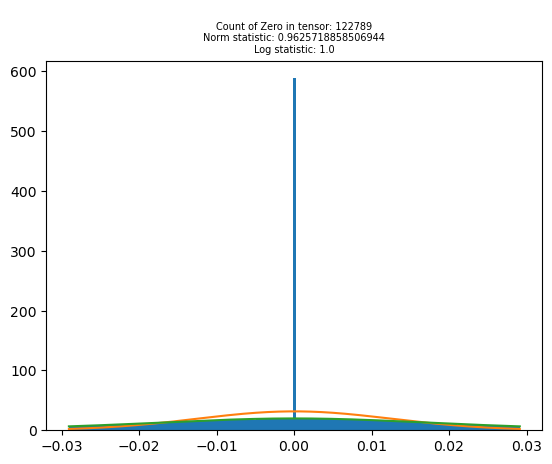

In [19]:
weighter.weightRationalization(layer, oneW, 1, inside=False)

layerTensor = weighter.layerSearch(layer)
plotDistribution(layerTensor)

In [20]:
label, outSoftmax, outIndex = weighter.outputCompute(60)

2025-01-16 22:08:44,495 data INFO 
Label: 0 
Prob: tensor([[0.8426, 0.1574]]) 
IndexMax: 0
10:08:44 INFO:
Label: 0 
Prob: tensor([[0.8426, 0.1574]]) 
IndexMax: 0
2025-01-16 22:08:44,779 data INFO 
Label: 1 
Prob: tensor([[0.1030, 0.8970]]) 
IndexMax: 1
10:08:44 INFO:
Label: 1 
Prob: tensor([[0.1030, 0.8970]]) 
IndexMax: 1
2025-01-16 22:08:44,902 data INFO 
Label: 0 
Prob: tensor([[0.5302, 0.4698]]) 
IndexMax: 0
10:08:44 INFO:
Label: 0 
Prob: tensor([[0.5302, 0.4698]]) 
IndexMax: 0
2025-01-16 22:08:45,013 data INFO 
Label: 0 
Prob: tensor([[0.5237, 0.4763]]) 
IndexMax: 0
10:08:45 INFO:
Label: 0 
Prob: tensor([[0.5237, 0.4763]]) 
IndexMax: 0
2025-01-16 22:08:45,160 data INFO 
Label: 1 
Prob: tensor([[0.7448, 0.2552]]) 
IndexMax: 0
10:08:45 INFO:
Label: 1 
Prob: tensor([[0.7448, 0.2552]]) 
IndexMax: 0
2025-01-16 22:08:45,314 data INFO 
Label: 1 
Prob: tensor([[0.5324, 0.4676]]) 
IndexMax: 0
10:08:45 INFO:
Label: 1 
Prob: tensor([[0.5324, 0.4676]]) 
IndexMax: 0
2025-01-16 22:08:45,414 data

Accuracy: 0.7833333333333333;
ROC AUC score: 0.8973214285714286, 0.10267857142857142;
F1: 0.7450980392156864
Precision: 0.8260869565217391;
Recall: 0.6785714285714286


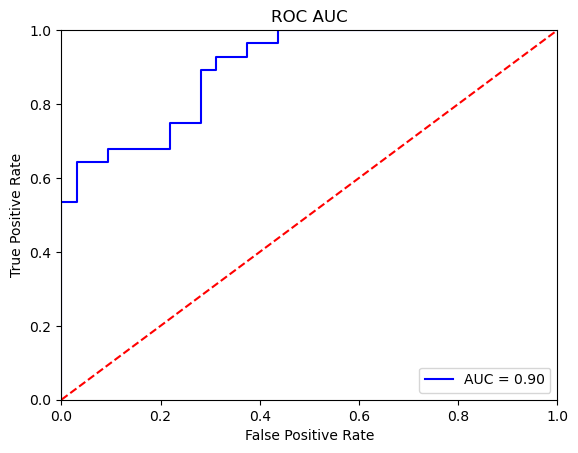

In [21]:
binaryMetricsCompute(label, outIndex, outSoftmax)
plotRocAuc(label, outSoftmax[:, 1])

In [22]:
for name, param in model.named_parameters():
    print(name)

bert.embeddings.word_embeddings.weight
bert.embeddings.position_embeddings.weight
bert.embeddings.token_type_embeddings.weight
bert.embeddings.LayerNorm.weight
bert.embeddings.LayerNorm.bias
bert.encoder.layer.0.attention.self.query.weight
bert.encoder.layer.0.attention.self.query.bias
bert.encoder.layer.0.attention.self.key.weight
bert.encoder.layer.0.attention.self.key.bias
bert.encoder.layer.0.attention.self.value.weight
bert.encoder.layer.0.attention.self.value.bias
bert.encoder.layer.0.attention.output.dense.weight
bert.encoder.layer.0.attention.output.dense.bias
bert.encoder.layer.0.attention.output.LayerNorm.weight
bert.encoder.layer.0.attention.output.LayerNorm.bias
bert.encoder.layer.0.intermediate.dense.weight
bert.encoder.layer.0.intermediate.dense.bias
bert.encoder.layer.0.output.dense.weight
bert.encoder.layer.0.output.dense.bias
bert.encoder.layer.0.output.LayerNorm.weight
bert.encoder.layer.0.output.LayerNorm.bias
bert.encoder.layer.1.attention.self.query.weight
bert.enc

In [23]:
layers = ["classifier.weight", "bert.pooler.dense.weight"]

massLayer = RationalWeight(model, tokenizer, dataset)
massLayer.weightFreeze()
massLayer.weightLayersRationalization(layers, sigma=1, scale=1, inside=False)

2025-01-16 22:08:52,134 data INFO bert.embeddings.word_embeddings.weight
10:08:52 INFO:bert.embeddings.word_embeddings.weight
2025-01-16 22:08:52,135 data INFO bert.embeddings.position_embeddings.weight
10:08:52 INFO:bert.embeddings.position_embeddings.weight
2025-01-16 22:08:52,135 data INFO bert.embeddings.token_type_embeddings.weight
10:08:52 INFO:bert.embeddings.token_type_embeddings.weight
2025-01-16 22:08:52,136 data INFO bert.embeddings.LayerNorm.weight
10:08:52 INFO:bert.embeddings.LayerNorm.weight
2025-01-16 22:08:52,137 data INFO bert.embeddings.LayerNorm.bias
10:08:52 INFO:bert.embeddings.LayerNorm.bias
2025-01-16 22:08:52,138 data INFO bert.encoder.layer.0.attention.self.query.weight
10:08:52 INFO:bert.encoder.layer.0.attention.self.query.weight
2025-01-16 22:08:52,138 data INFO bert.encoder.layer.0.attention.self.query.bias
10:08:52 INFO:bert.encoder.layer.0.attention.self.query.bias
2025-01-16 22:08:52,139 data INFO bert.encoder.layer.0.attention.self.key.weight
10:08:52 


Number of ZERO: 122789;
Percent of ZERO: 0.2081790566444397;
    



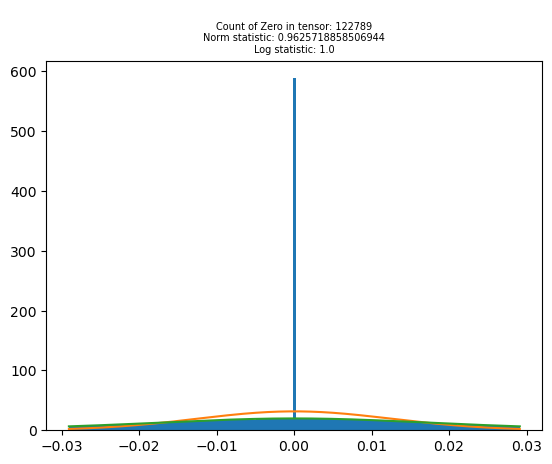

In [24]:
plotDistribution(massLayer.layerSearch(layers[1]))

2025-01-16 22:08:53,747 data INFO 
Label: 0 
Prob: tensor([[0.6172, 0.3828]]) 
IndexMax: 0
10:08:53 INFO:
Label: 0 
Prob: tensor([[0.6172, 0.3828]]) 
IndexMax: 0
2025-01-16 22:08:54,057 data INFO 
Label: 1 
Prob: tensor([[0.3468, 0.6532]]) 
IndexMax: 1
10:08:54 INFO:
Label: 1 
Prob: tensor([[0.3468, 0.6532]]) 
IndexMax: 1
2025-01-16 22:08:54,198 data INFO 
Label: 0 
Prob: tensor([[0.5203, 0.4797]]) 
IndexMax: 0
10:08:54 INFO:
Label: 0 
Prob: tensor([[0.5203, 0.4797]]) 
IndexMax: 0
2025-01-16 22:08:54,323 data INFO 
Label: 0 
Prob: tensor([[0.5050, 0.4950]]) 
IndexMax: 0
10:08:54 INFO:
Label: 0 
Prob: tensor([[0.5050, 0.4950]]) 
IndexMax: 0
2025-01-16 22:08:54,497 data INFO 
Label: 1 
Prob: tensor([[0.5844, 0.4156]]) 
IndexMax: 0
10:08:54 INFO:
Label: 1 
Prob: tensor([[0.5844, 0.4156]]) 
IndexMax: 0
2025-01-16 22:08:54,630 data INFO 
Label: 1 
Prob: tensor([[0.5212, 0.4788]]) 
IndexMax: 0
10:08:54 INFO:
Label: 1 
Prob: tensor([[0.5212, 0.4788]]) 
IndexMax: 0
2025-01-16 22:08:54,739 data

Accuracy: 0.7833333333333333;
ROC AUC score: 0.8973214285714286, 0.10267857142857144;
F1: 0.7450980392156864
Precision: 0.8260869565217391;
Recall: 0.6785714285714286


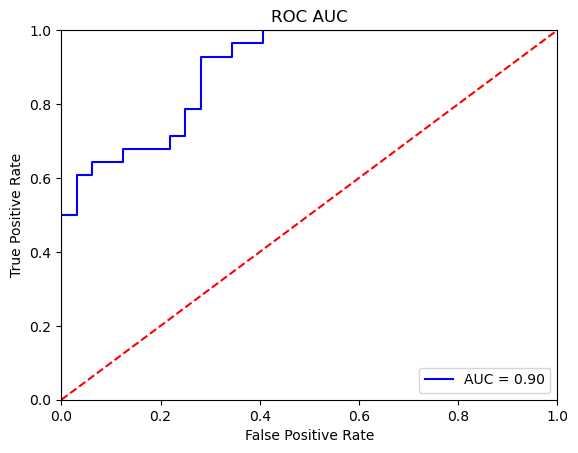

In [25]:
label, outSoftmax, outIndex = massLayer.outputCompute(60)
binaryMetricsCompute(label, outIndex, outSoftmax)
plotRocAuc(label, outSoftmax[:, 1])

In [26]:
excludeModule = ["classifier.bias", "classifier.weight", "attention"]
total = RationalWeight(model, tokenizer, dataset)
total.weightFreeze()
layerPruning = total.weightRationalizationWithoutModule(excludeModule, sigma=1, scale=1, inside=False)

2025-01-16 22:09:01,409 data INFO bert.embeddings.word_embeddings.weight
10:09:01 INFO:bert.embeddings.word_embeddings.weight
2025-01-16 22:09:01,410 data INFO bert.embeddings.position_embeddings.weight
10:09:01 INFO:bert.embeddings.position_embeddings.weight
2025-01-16 22:09:01,411 data INFO bert.embeddings.token_type_embeddings.weight
10:09:01 INFO:bert.embeddings.token_type_embeddings.weight
2025-01-16 22:09:01,412 data INFO bert.embeddings.LayerNorm.weight
10:09:01 INFO:bert.embeddings.LayerNorm.weight
2025-01-16 22:09:01,412 data INFO bert.embeddings.LayerNorm.bias
10:09:01 INFO:bert.embeddings.LayerNorm.bias
2025-01-16 22:09:01,414 data INFO bert.encoder.layer.0.attention.self.query.weight
10:09:01 INFO:bert.encoder.layer.0.attention.self.query.weight
2025-01-16 22:09:01,414 data INFO bert.encoder.layer.0.attention.self.query.bias
10:09:01 INFO:bert.encoder.layer.0.attention.self.query.bias
2025-01-16 22:09:01,415 data INFO bert.encoder.layer.0.attention.self.key.weight
10:09:01 

2025-01-16 22:09:05,617 data INFO 
Label: 0 
Prob: tensor([[0.0657, 0.9343]]) 
IndexMax: 1
10:09:05 INFO:
Label: 0 
Prob: tensor([[0.0657, 0.9343]]) 
IndexMax: 1
2025-01-16 22:09:05,719 data INFO 
Label: 1 
Prob: tensor([[0.0437, 0.9563]]) 
IndexMax: 1
10:09:05 INFO:
Label: 1 
Prob: tensor([[0.0437, 0.9563]]) 
IndexMax: 1
2025-01-16 22:09:06,028 data INFO 
Label: 0 
Prob: tensor([[0.0598, 0.9402]]) 
IndexMax: 1
10:09:06 INFO:
Label: 0 
Prob: tensor([[0.0598, 0.9402]]) 
IndexMax: 1
2025-01-16 22:09:06,137 data INFO 
Label: 0 
Prob: tensor([[0.0408, 0.9592]]) 
IndexMax: 1
10:09:06 INFO:
Label: 0 
Prob: tensor([[0.0408, 0.9592]]) 
IndexMax: 1
2025-01-16 22:09:06,281 data INFO 
Label: 1 
Prob: tensor([[0.0397, 0.9603]]) 
IndexMax: 1
10:09:06 INFO:
Label: 1 
Prob: tensor([[0.0397, 0.9603]]) 
IndexMax: 1
2025-01-16 22:09:06,380 data INFO 
Label: 1 
Prob: tensor([[0.0862, 0.9138]]) 
IndexMax: 1
10:09:06 INFO:
Label: 1 
Prob: tensor([[0.0862, 0.9138]]) 
IndexMax: 1
2025-01-16 22:09:06,456 data

Accuracy: 0.44;
ROC AUC score: 0.650974025974026, 0.349025974025974;
F1: 0.6111111111111112
Precision: 0.44;
Recall: 1.0


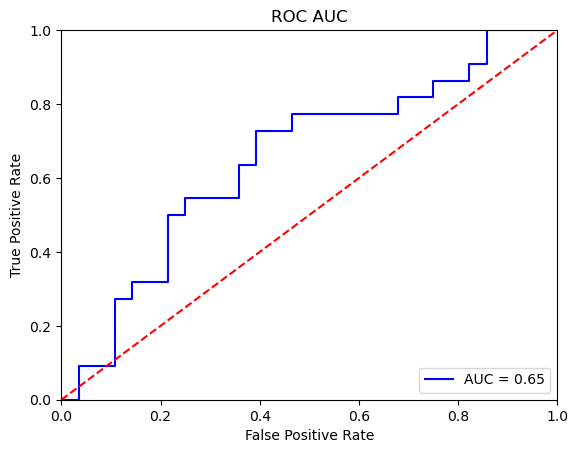

In [27]:
label, outSoftmax, outIndex = total.outputCompute(50)
binaryMetricsCompute(label, outIndex, outSoftmax)
plotRocAuc(label, outSoftmax[:, 1])

In [28]:
layerPruning

['bert.embeddings.word_embeddings.weight',
 'bert.embeddings.position_embeddings.weight',
 'bert.embeddings.token_type_embeddings.weight',
 'bert.embeddings.LayerNorm.weight',
 'bert.embeddings.LayerNorm.bias',
 'bert.encoder.layer.0.intermediate.dense.weight',
 'bert.encoder.layer.0.intermediate.dense.bias',
 'bert.encoder.layer.0.output.dense.weight',
 'bert.encoder.layer.0.output.dense.bias',
 'bert.encoder.layer.0.output.LayerNorm.weight',
 'bert.encoder.layer.0.output.LayerNorm.bias',
 'bert.encoder.layer.1.intermediate.dense.weight',
 'bert.encoder.layer.1.intermediate.dense.bias',
 'bert.encoder.layer.1.output.dense.weight',
 'bert.encoder.layer.1.output.dense.bias',
 'bert.encoder.layer.1.output.LayerNorm.weight',
 'bert.encoder.layer.1.output.LayerNorm.bias',
 'bert.encoder.layer.2.intermediate.dense.weight',
 'bert.encoder.layer.2.intermediate.dense.bias',
 'bert.encoder.layer.2.output.dense.weight',
 'bert.encoder.layer.2.output.dense.bias',
 'bert.encoder.layer.2.output.Lay


Number of ZERO: 0;
Percent of ZERO: 0.0;
    



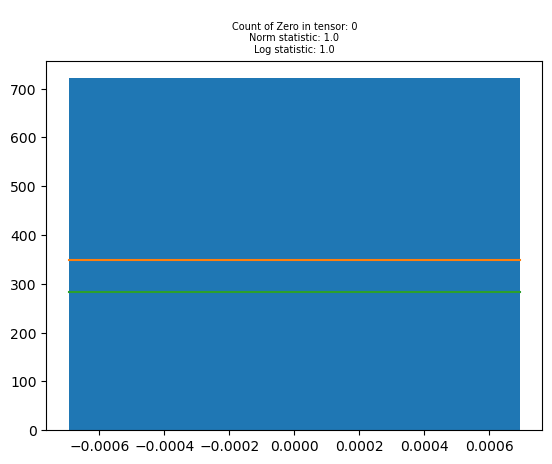

In [29]:
plotDistribution(total.layerSearch("classifier.bias"))